# Assignment 2

## Problem 1

### Load the data

In [1]:
import xml.etree.ElementTree as ET
tree = ET.parse('hw2-patients.xml')
root = tree.getroot()

In [2]:
for child in root:
    print(child)

<Element 'generated' at 0x7f6bf86ef180>
<Element 'institution' at 0x7f6bfc7aa3b0>
<Element 'patients' at 0x7f6bf86f4590>


In [3]:
patients_ET = root[2]

In [4]:
patient = patients_ET[0]

In [5]:
patient.attrib

{'age': '19.529988374393394', 'gender': 'female', 'name': 'Tammy Martin'}

In [6]:
patient_dicts = []
for patient in patients_ET:
    patient_dict = {
        'name'  : patient.attrib['name'],
        'age'   : float(patient.attrib['age']),
        'gender': patient.attrib['gender']
    }
    patient_dicts.append(patient_dict)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
patient_df = pd.DataFrame(patient_dicts)

In [9]:
patient_df.head()

,name,age,gender
0,Tammy Martin,19.529988,female
1,Lucy Stribley,1.602197,female
2,Albert Trevino,19.317023,male
3,Troy Armour,79.441208,male
4,Jose Masseria,71.203863,male


### Plot histogram of ages

Text(0.5, 0, 'Age')

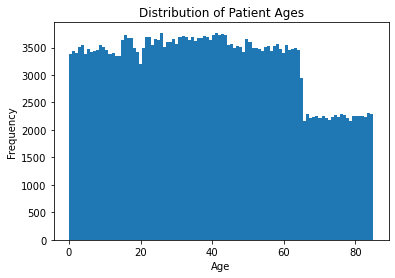

In [10]:
patient_df.age.plot(kind='hist', 
                title='Distribution of Patient Ages',
                xlabel='Age',
                ylabel='Frequency',
                bins=100)
plt.xlabel('Age')

### Do any patients share the same exact age?

In [11]:
ages = patient_df.age
print(f"#Patients = {ages.size}") #Number of rows
print(f"#Distinct Ages = {ages.nunique()}") #Number of unique values for age

#Patients = 324357
#Distinct Ages = 324357


These numbers are the same! Hence every age value is unique

Because all ages are unique, we don't have to worry about edge cases later when we are sorting by age. For example, our oldest and second oldest patients will never have the same age

### Plot the distribution of genders. How did this provider encode gender?

Text(0, 0.5, 'Frequency')

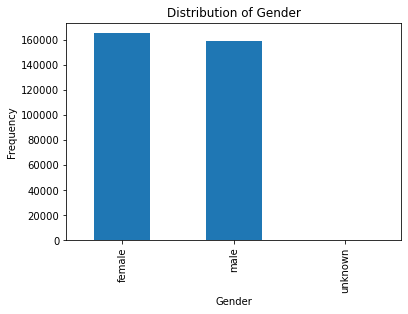

In [12]:
patient_df.gender.value_counts().plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")

3 Categories shown: male, female, unknown

### Describe how you could find the second oldest person's name in O(n) time. 

Just keep two running variables as we go through the list--the biggest, and the second biggest (so far). For each element on the list, compare it with each variable. 

If new < second biggest:
    disregard, move on to next item
If new > biggest:
    second biggest = biggest
    biggest = new
If biggest > new > second biggest:
    second biggest = new

### Discuss when it might be advantageous to sort and when it is better to just use O(n) solution
If the list is dynamic, its biggest element is frequently changing, and we frequently wish to know what its biggest element is, then we definitely want to have the list sorted, so that our frequent lookup operation is efficient. 

If the list is static, or if we don't often need to know the maximum age, then sorting may not be worth our time

### Use bisection on a sorted list to find a patient who is 41.5 years old

In [13]:
sorted_df = patient_df.sort_values(by='age')

In [14]:
sorted_list = sorted_df.values.tolist()

In [15]:
sorted_list[0]

['Timothy Larson', 0.00010629282758800596, 'male']

NOTE Prompt says to find patient, not index, then later asks you to use arithmetic to find how many people are at least 41.5 years old. If they implement bisect search recursively as I have, this is not a simple arithmetic problem. Makes sense to either rephrase first part as "find the index of the person with age 41.5" or to relax how we find the list of 41.5+ old patients

In [16]:
import math
def bisect_search_recursive(patient_list, search_val):
    size = len(patient_list)
    if(size == 0):
        return None
    else:
        split_index = math.floor(size/2)
        split_patient = patient_list[split_index]
        if(search_val > split_patient[1]):
            #search through all elements after split index
            return bisect_search_recursive(patient_list[split_index + 1:], search_val)
        elif(search_val < split_patient[1]):
            #search through all elements before split index
            return bisect_search_recursive(patient_list[:split_index], search_val)
        else:
            return split_patient
        
        

In [17]:
print(bisect_search_recursive(sorted_list, 41.5))

['John Braswell', 41.5, 'male']


In [18]:
def bisect_search_loop(patient_list, search_val):
    firstdex = 0
    lastdex = len(patient_list) - 1
    span = lastdex - firstdex
    
    while(span > 0):
        splitdex = math.floor((firstdex + lastdex)/2)
        split_patient = patient_list[splitdex]
        if(search_val > split_patient[1]):
            firstdex = splitdex+1
        elif(search_val < split_patient[1]):
            lastdex = splitdex
        else:
            return (splitdex, 1)
        span = lastdex - firstdex
    return (splitdex, 0)

In [19]:
index, match_found = bisect_search_loop(sorted_list, 41.5)
print(index, match_found)

173886 True


In [27]:
print(f"There are {len(sorted_list)- index - 1} people of age at least 41.5")

There are 150470 people of age at least 41.5


In [30]:
def count_age_range(min_age, max_age):
    mindex, minmatch = bisect_search_loop(sorted_list, min_age)
    maxdex, maxmatch = bisect_search_loop(sorted_list, max_age)
    
    count = maxdex - mindex + minmatch + maxmatch
    return count

In [31]:
count_age_range(41.5, 100)

150470

In [43]:
def count_age_range_male(min_age, max_age):
    
    mindex, minmatch = bisect_search_loop(sorted_list, min_age)
    maxdex, maxmatch = bisect_search_loop(sorted_list, max_age)
    
    male_minmatch = 1 if sorted_list[mindex][2] == 'male' else 0
    print(male_minmatch)
    male_maxmatch = 1 if sorted_list[maxdex][2] == 'male' else 0
    print(male_maxmatch)
    
    total_count = minmatch + maxmatch
    male_count = minmatch*male_minmatch + maxmatch*male_maxmatch
    
    for patient in sorted_list[mindex: maxdex]:
        total_count += 1
        if patient[2] == 'male':
            male_count += 1
    
    return male_count, total_count

In [44]:
count_age_range_male(41.5, 100)

1
1


(71308, 150470)

In [45]:
patient_df[(patient_df.age > 41.5) & (patient_df.gender == 'male')].count()

name      71307
age       71307
gender    71307
dtype: int64

In [46]:
patient_df[(patient_df.age > 41.5)].count()

name      150470
age       150470
gender    150470
dtype: int64